ML4VA

Helen Yao, Eva Butler, and Larissa Cybyk

In [56]:
import pandas as pd
import numpy as np

Data Cleaning & Visualization

loading/condensing crash data:

In [57]:
import datetime
try:
    crash_data = pd.read_csv('./crash_data.csv', sep='\t')
except:

    crash_data = pd.read_csv('./CrashData_test.csv')
    # crash_data.head()

    # crash_data.isnull().sum()

    crash_data = crash_data[['RTE Name','Crash Date']]

    # print(crash_data)

    crash_data['Crash Date'] = pd.to_datetime(crash_data['Crash Date'].str.split(' ', expand=True)[0], format='%m/%d/%Y')


    duplicate = crash_data.pivot_table(index = ['RTE Name', 'Crash Date'], aggfunc ='size')

    crash_data['Total Crashes'] = crash_data.set_index(['RTE Name', 'Crash Date']).index.map(duplicate)

    crash_data = crash_data.drop_duplicates()
    print(crash_data)

    # f = open("crash_data.csv", "a")
    crash_data.to_csv("crash_data.csv", sep='\t', encoding='utf-8')
    # f.close()

In [58]:
crash_data.head()

,Unnamed: 0,RTE Name,Crash Date,Total Crashes
0,0,R-VA IS00095NB,2016-12-06,15
1,1,S-VA114NP WOODLAND RD,2016-01-26,1
2,2,R-VA066SC00640NB,2016-02-13,1
3,3,R-VA042SC00782SB,2016-03-26,1
4,4,R-VA US00220NB,2016-07-18,1


loading/cleaning traffic volume data:

In [59]:
# load data

traffic_volume = pd.read_csv('./VDOT_Traffic_Volume.csv')

In [60]:
traffic_volume.head()

traffic_volume.columns
print(traffic_volume.shape)
nulls = traffic_volume.isnull().sum()
print(nulls)

(121679, 42)
OBJECTID                             0
LINKID                               0
DATA_DATE                            0
ROUTE_COMMON_NAME                    0
ROUTE_NAME                           0
HTRIS_ID                           745
ROUTE_ALIAS                          0
START_LABEL                          0
END_LABEL                            0
ADT                                  3
ADT_QUALITY                          0
PERCENT_4_TIRE                   94712
PERCENT_BUS                      94712
PERCENT_TRUCK_2_AXLE             94712
PERCENT_TRUCK_3_AXLE             94712
PERCENT_TRUCK_1_TRAIL            94712
PERCENT_TRUCK_2_TRAIL            94712
CLASS_QUALITY_CODE                   0
K_FACTOR                         92351
K_FACTOR_QUALITY_CODE               63
DIRECTION_FACTOR                 92371
AAWDT                            91950
AAWDT_QUALITY_CODE                   6
LOC_COMP_DIRECTIONALITY_NAME       196
ROUTE_FROM_MEASURE                   0
FROM_JURISDI

In [61]:
# dropping null columns / columns with a lot of missing data

to_drop = []
for col in traffic_volume.columns:
    if nulls[col] > 90000:
        to_drop.append(col)
print(to_drop)
traffic_volume = traffic_volume.drop(columns=to_drop)

['PERCENT_4_TIRE', 'PERCENT_BUS', 'PERCENT_TRUCK_2_AXLE', 'PERCENT_TRUCK_3_AXLE', 'PERCENT_TRUCK_1_TRAIL', 'PERCENT_TRUCK_2_TRAIL', 'K_FACTOR', 'DIRECTION_FACTOR', 'AAWDT', 'PEAK_SINGLE_UNIT_TRUCK', 'PEAK_COMBINATION_TRUCK', 'DATA_CUSTODIAN_EMAIL', 'METADATA_URL']


In [62]:
traffic_volume.isnull().sum()

OBJECTID                          0
LINKID                            0
DATA_DATE                         0
ROUTE_COMMON_NAME                 0
ROUTE_NAME                        0
HTRIS_ID                        745
ROUTE_ALIAS                       0
START_LABEL                       0
END_LABEL                         0
ADT                               3
ADT_QUALITY                       0
CLASS_QUALITY_CODE                0
K_FACTOR_QUALITY_CODE            63
AAWDT_QUALITY_CODE                6
LOC_COMP_DIRECTIONALITY_NAME    196
ROUTE_FROM_MEASURE                0
FROM_JURISDICTION                19
ROUTE_TO_MEASURE                  0
TO_JURISDICTION                  13
EVENT_SOURCE_ID                   0
EVENT_LOCATION_ID                 0
EVENT_COMPONENT_ID                0
MAXIMUMSCALEDENOMINATOR           9
ROUTE_COMMON_NAME_ADT             0
FROM_DISTRICT                   431
TO_DISTRICT                     544
RTE_TYPE_CD                       0
RTE_ID                      

In [63]:
# adding day of week feature
import re
import calendar

def convert_date(date, delim='/'):
    stripped = date.split(delim)
    try:
        given_date = datetime.datetime(int(stripped[2][:4]), int(stripped[0]), int(stripped[1]))
        
    except:
        given_date = datetime.datetime(int(stripped[0]), int(stripped[1]), int(stripped[2][:2]))
    return given_date
        
    
def day_of_week(given_date):
    day_num = given_date.weekday()
    day = 'sunday'
    if day_num == 0:
        day = 'monday'
    elif day_num == 1:
        day = 'tuesday'
    elif day_num == 2:
        day = 'wednesday'
    elif day_num == 3:
        day = 'thursday'
    elif day_num == 4:
        day = 'friday'
    elif day_num == 5:
        day = 'saturday'
    
    return day

def get_day(given_date):
    return given_date.day

def get_month(given_date):
    return given_date.month

def get_year(given_date):
    return given_date.year

** going to drop data_date once datasets are merged

In [64]:
traffic_volume['DATA_DATE'] = traffic_volume['DATA_DATE'].apply(convert_date) #converting data date into datetime

In [65]:
traffic_volume['DAY_WEEK'] = traffic_volume['DATA_DATE'].apply(day_of_week)
traffic_volume['DAY'] = traffic_volume['DATA_DATE'].apply(get_day)
traffic_volume['MONTH'] = traffic_volume['DATA_DATE'].apply(get_month)
traffic_volume['YEAR'] = traffic_volume['DATA_DATE'].apply(get_year)

In [66]:
traffic_volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121679 entries, 0 to 121678
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   OBJECTID                      121679 non-null  int64         
 1   LINKID                        121679 non-null  int64         
 2   DATA_DATE                     121679 non-null  datetime64[ns]
 3   ROUTE_COMMON_NAME             121679 non-null  object        
 4   ROUTE_NAME                    121679 non-null  object        
 5   HTRIS_ID                      120934 non-null  object        
 6   ROUTE_ALIAS                   121679 non-null  object        
 7   START_LABEL                   121679 non-null  object        
 8   END_LABEL                     121679 non-null  object        
 9   ADT                           121676 non-null  float64       
 10  ADT_QUALITY                   121679 non-null  object        
 11  CLASS_QUALITY

merge datasets BEFORE dropping

In [67]:
crash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778666 entries, 0 to 778665
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     778666 non-null  int64 
 1   RTE Name       778666 non-null  object
 2   Crash Date     778666 non-null  object
 3   Total Crashes  778666 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 23.8+ MB


In [68]:
type(crash_data['Crash Date'].unique()[0])

str

In [69]:
def convert_crash_date(date):
    if type(date) == pd._libs.tslibs.timestamps.Timestamp:
        return date
    stripped = date.split('-')
    try:
        given_date = datetime.datetime(int(stripped[2][:4]), int(stripped[0]), int(stripped[1]))
        
    except:
        given_date = datetime.datetime(int(stripped[0]), int(stripped[1]), int(stripped[2][:2]))
    return given_date

In [70]:
crash_data['Crash Date'] = crash_data['Crash Date'].apply(convert_crash_date)

In [71]:
crash_data.head()

,Unnamed: 0,RTE Name,Crash Date,Total Crashes
0,0,R-VA IS00095NB,2016-12-06,15
1,1,S-VA114NP WOODLAND RD,2016-01-26,1
2,2,R-VA066SC00640NB,2016-02-13,1
3,3,R-VA042SC00782SB,2016-03-26,1
4,4,R-VA US00220NB,2016-07-18,1


In [72]:
# merging
new_df = pd.merge(
    left=traffic_volume, 
    right=crash_data,
    how='left',
    left_on=['DATA_DATE', 'ROUTE_NAME'],
    right_on=['Crash Date', 'RTE Name']
)

In [73]:
len(traffic_volume['DATA_DATE'].unique()) #2902 dates in traffic volume data

2902

In [74]:
len(crash_data['Crash Date'].unique()) #3166 dates in traffic volume data

3166

In [75]:
len(set(traffic_volume['DATA_DATE']).intersection(crash_data['Crash Date'])) # only 1266 dates that overlap

1266

In [76]:
len(traffic_volume['ROUTE_NAME'].unique())

64941

In [77]:
len(crash_data['RTE Name'].unique())

59716

In [78]:
len(set(traffic_volume['ROUTE_NAME']).intersection(crash_data['RTE Name'])) # 18766 routes overlap

18766

In [79]:
new_df.shape

(121679, 37)

In [80]:
new_df.isnull().sum()

OBJECTID                             0
LINKID                               0
DATA_DATE                            0
ROUTE_COMMON_NAME                    0
ROUTE_NAME                           0
HTRIS_ID                           745
ROUTE_ALIAS                          0
START_LABEL                          0
END_LABEL                            0
ADT                                  3
ADT_QUALITY                          0
CLASS_QUALITY_CODE                   0
K_FACTOR_QUALITY_CODE               63
AAWDT_QUALITY_CODE                   6
LOC_COMP_DIRECTIONALITY_NAME       196
ROUTE_FROM_MEASURE                   0
FROM_JURISDICTION                   19
ROUTE_TO_MEASURE                     0
TO_JURISDICTION                     13
EVENT_SOURCE_ID                      0
EVENT_LOCATION_ID                    0
EVENT_COMPONENT_ID                   0
MAXIMUMSCALEDENOMINATOR              9
ROUTE_COMMON_NAME_ADT                0
FROM_DISTRICT                      431
TO_DISTRICT              

dropping route identifiers, addresses, etc and double columns from merge

In [81]:
to_drop = ['ROUTE_COMMON_NAME', 'ROUTE_NAME', 'ROUTE_ALIAS', 'END_LABEL', 'START_LABEL', 'ADT_QUALITY', 'CLASS_QUALITY_CODE', 'K_FACTOR_QUALITY_CODE', 'AAWDT_QUALITY_CODE', 'MAXIMUMSCALEDENOMINATOR', 'ROUTE_COMMON_NAME_ADT','HTRIS_ID', 'Crash Date', 'RTE Name', 'Unnamed: 0', 'DATA_DATE', 'LINKID', 'OBJECTID']

In [82]:
combined_df = new_df.drop(columns=to_drop)

In [83]:
combined_df.head()

,ADT,LOC_COMP_DIRECTIONALITY_NAME,ROUTE_FROM_MEASURE,FROM_JURISDICTION,ROUTE_TO_MEASURE,TO_JURISDICTION,EVENT_SOURCE_ID,EVENT_LOCATION_ID,EVENT_COMPONENT_ID,FROM_DISTRICT,TO_DISTRICT,RTE_TYPE_CD,RTE_ID,Shape__Length,DAY_WEEK,DAY,MONTH,YEAR,Total Crashes
0,490.0,Bidirectional,0.000,Frederick County,0.24,Frederick County,795997,1,1,Staunton,Staunton,SC,2532756,478.381712,tuesday,7,6,2011,NaN
1,10.0,Bidirectional,0.620,Campbell County,0.64,Campbell County,709217,1,1,Lynchburg,Lynchburg,SC,1733670,47.494224,tuesday,10,12,2019,NaN
2,150.0,Bidirectional,3.180,Dickenson County,7.55,Dickenson County,720637,1,1,Bristol,Bristol,SC,1857885,8693.982351,monday,29,11,2021,NaN
3,47.0,Bidirectional,2.000,Nelson County,5.40,Nelson County,755648,1,1,Lynchburg,Lynchburg,SC,2111709,6516.476138,thursday,30,7,2020,NaN
4,30.0,Bidirectional,2.031,Washington County,2.08,Washington County,776797,1,1,Bristol,Bristol,SC,1594318,100.504177,friday,7,7,2017,NaN


In [84]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121679 entries, 0 to 121678
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   ADT                           121676 non-null  float64
 1   LOC_COMP_DIRECTIONALITY_NAME  121483 non-null  object 
 2   ROUTE_FROM_MEASURE            121679 non-null  float64
 3   FROM_JURISDICTION             121660 non-null  object 
 4   ROUTE_TO_MEASURE              121679 non-null  float64
 5   TO_JURISDICTION               121666 non-null  object 
 6   EVENT_SOURCE_ID               121679 non-null  int64  
 7   EVENT_LOCATION_ID             121679 non-null  int64  
 8   EVENT_COMPONENT_ID            121679 non-null  int64  
 9   FROM_DISTRICT                 121248 non-null  object 
 10  TO_DISTRICT                   121135 non-null  object 
 11  RTE_TYPE_CD                   121679 non-null  object 
 12  RTE_ID                        121679 non-nul

In [85]:
for feature in combined_df.select_dtypes("object"):
    print(feature, len(combined_df[feature].unique()))

LOC_COMP_DIRECTIONALITY_NAME 4
FROM_JURISDICTION 185
TO_JURISDICTION 185
FROM_DISTRICT 10
TO_DISTRICT 10
RTE_TYPE_CD 8
DAY_WEEK 7


Final combined dataframe:

In [86]:
combined_df['Total Crashes'] = combined_df['Total Crashes'].fillna(0)

In [87]:
combined_df.head()

,ADT,LOC_COMP_DIRECTIONALITY_NAME,ROUTE_FROM_MEASURE,FROM_JURISDICTION,ROUTE_TO_MEASURE,TO_JURISDICTION,EVENT_SOURCE_ID,EVENT_LOCATION_ID,EVENT_COMPONENT_ID,FROM_DISTRICT,TO_DISTRICT,RTE_TYPE_CD,RTE_ID,Shape__Length,DAY_WEEK,DAY,MONTH,YEAR,Total Crashes
0,490.0,Bidirectional,0.000,Frederick County,0.24,Frederick County,795997,1,1,Staunton,Staunton,SC,2532756,478.381712,tuesday,7,6,2011,0.0
1,10.0,Bidirectional,0.620,Campbell County,0.64,Campbell County,709217,1,1,Lynchburg,Lynchburg,SC,1733670,47.494224,tuesday,10,12,2019,0.0
2,150.0,Bidirectional,3.180,Dickenson County,7.55,Dickenson County,720637,1,1,Bristol,Bristol,SC,1857885,8693.982351,monday,29,11,2021,0.0
3,47.0,Bidirectional,2.000,Nelson County,5.40,Nelson County,755648,1,1,Lynchburg,Lynchburg,SC,2111709,6516.476138,thursday,30,7,2020,0.0
4,30.0,Bidirectional,2.031,Washington County,2.08,Washington County,776797,1,1,Bristol,Bristol,SC,1594318,100.504177,friday,7,7,2017,0.0


additional features may be added or dropped after some testing:

visualization:

In [88]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

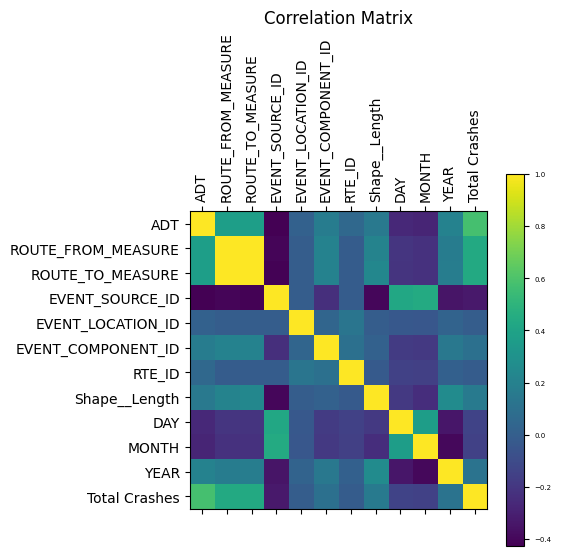

In [89]:
plt.matshow(combined_df.corr(numeric_only=True))

# plt.xticks(range(insurance.select_dtypes(['number']).shape[1]), insurance.select_dtypes(['number']).columns, fontsize=10, rotation=90)
# plt.yticks(range(insurance.select_dtypes(['number']).shape[1]), insurance.select_dtypes(['number']).columns, fontsize=10)

plt.xticks(range(combined_df.select_dtypes(['number']).shape[1]), combined_df.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(combined_df.select_dtypes(['number']).shape[1]), combined_df.select_dtypes(['number']).columns, fontsize=10)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=5)

plt.title('Correlation Matrix')
plt.show()

In [ ]:
combined_df.describe()

In [ ]:
combined_df.hist(bins=50, figsize=(24,16))
plt.show()

<Axes: xlabel='MONTH', ylabel='ADT'>

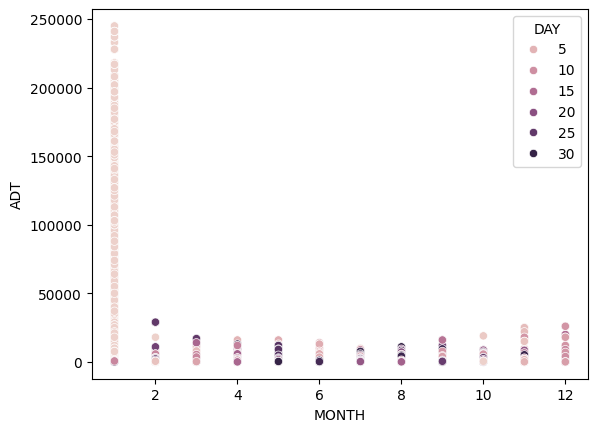

In [ ]:
import seaborn as sns
sns.scatterplot(data=combined_df,x='MONTH',y='ADT', hue='DAY')

<Axes: xlabel='YEAR', ylabel='ADT'>

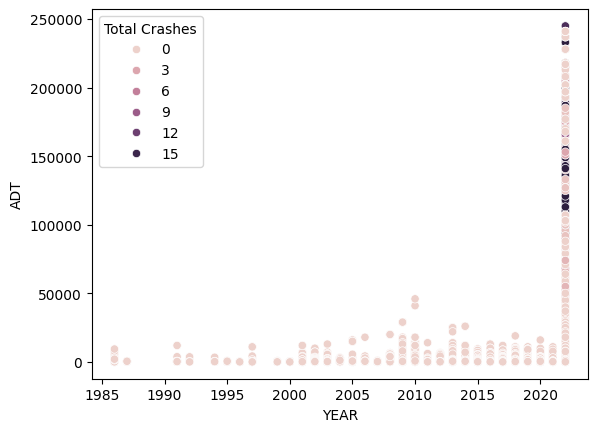

In [ ]:
sns.scatterplot(data=combined_df,x='YEAR',y='ADT', hue='Total Crashes')

<Axes: xlabel='YEAR', ylabel='Total Crashes'>

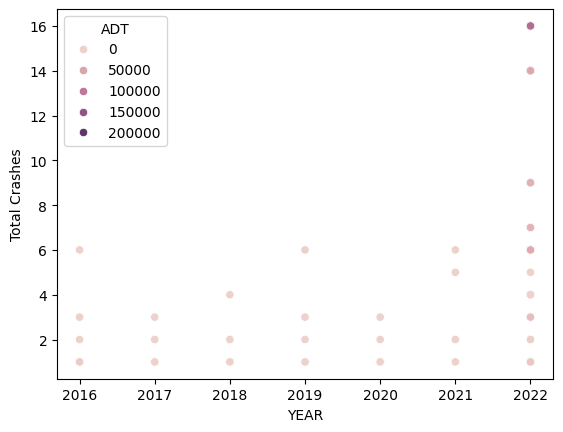

In [ ]:
sns.scatterplot(data=combined_df,x='YEAR',y='Total Crashes', hue='ADT')

<Axes: xlabel='ADT', ylabel='Density'>

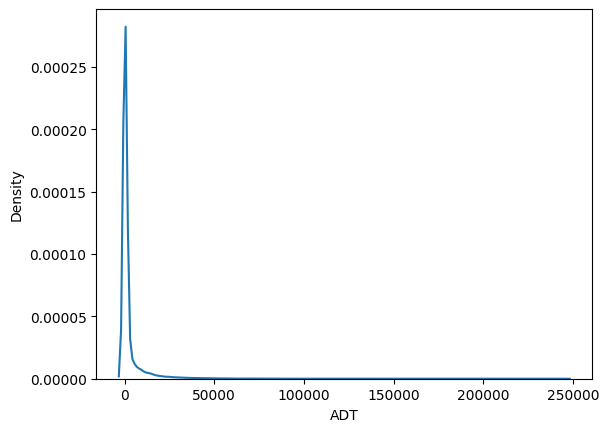

In [ ]:
sns.kdeplot(combined_df['ADT']) # a lot of 0s...

Transformation and model:

In [99]:
# Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

combined_df.dropna(subset=['ADT'], inplace=True)
combined_df = combined_df[combined_df["FROM_JURISDICTION"] != "Town of Narrows"]

train_set, test_set = train_test_split(combined_df)

train_labels = train_set["ADT"].copy()

traffic_train = train_set.drop("ADT", axis=1)

test_labels = test_set["ADT"].copy()

traffic_test = test_set.drop("ADT", axis=1)

num_attr = ["ROUTE_FROM_MEASURE","ROUTE_TO_MEASURE", "DAY", "MONTH", "YEAR", "Total Crashes", "Shape__Length"]
cat_attr = ["LOC_COMP_DIRECTIONALITY_NAME","FROM_JURISDICTION", "TO_JURISDICTION", "FROM_DISTRICT", "TO_DISTRICT","DAY_WEEK"]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])



full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attr),
        ("cat", OneHotEncoder(), cat_attr),
    ])

traffic_prepared = full_pipeline.fit_transform(traffic_train)

print(traffic_prepared)

  (0, 0)	-0.20219697419208302
  (0, 1)	-0.21410157310156572
  (0, 2)	0.4317195359236261
  (0, 3)	0.19549279393964888
  (0, 4)	-0.4545189570957395
  (0, 5)	-0.12944790516349036
  (0, 6)	-0.4946693813918912
  (0, 7)	1.0
  (0, 31)	1.0
  (0, 215)	1.0
  (0, 385)	1.0
  (0, 395)	1.0
  (0, 404)	1.0
  (1, 0)	-0.20219697419208302
  (1, 1)	-0.21137045620912928
  (1, 2)	1.4619434297932334
  (1, 3)	-1.185881031324517
  (1, 4)	-0.062177237154699895
  (1, 5)	-0.12944790516349036
  (1, 6)	-0.3932911842277726
  (1, 7)	1.0
  (1, 81)	1.0
  (1, 265)	1.0
  (1, 386)	1.0
  (1, 396)	1.0
  :	:
  (91254, 1)	-0.21328223803383478
  (91254, 2)	-1.1136163048807848
  (91254, 3)	-1.185881031324517
  (91254, 4)	0.9186770626978991
  (91254, 5)	-0.12944790516349036
  (91254, 6)	-0.40187338677905093
  (91254, 9)	1.0
  (91254, 91)	1.0
  (91254, 275)	1.0
  (91254, 385)	1.0
  (91254, 395)	1.0
  (91254, 401)	1.0
  (91255, 0)	-0.14258505960003764
  (91255, 1)	-0.10513000909335245
  (91255, 2)	-1.1136163048807848
  (91255, 3)	

In [91]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

traffic_prepared.shape

# train_labels.isnull().sum()

lin_reg.fit(traffic_prepared, train_labels)

some_data = combined_df.iloc[:5]
some_labels = train_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
# Note here that you only use transform() instead of fit_tranform becausue you are not trying to learn any parameter (ie. median)
print(some_data_prepared)
print("Predictions:", lin_reg.predict(some_data_prepared))

print("Labels:", list(some_labels))

  (0, 0)	-0.20293841925054248
  (0, 1)	-0.21043054569154787
  (0, 2)	-0.4946215903921851
  (0, 3)	0.19652031471915815
  (0, 4)	-1.2387481244531757
  (0, 5)	-0.1293764553447487
  (0, 6)	-0.3372418317369912
  (0, 7)	1.0
  (0, 82)	1.0
  (0, 266)	1.0
  (0, 387)	1.0
  (0, 397)	1.0
  (0, 404)	1.0
  (1, 0)	-0.18594196108590563
  (1, 1)	-0.1995289017156777
  (1, 2)	-0.1853619436924055
  (1, 3)	1.851851158389659
  (1, 4)	0.3295219780092643
  (1, 5)	-0.1293764553447487
  (1, 6)	-0.5626147551963558
  (1, 7)	1.0
  (1, 26)	1.0
  (1, 210)	1.0
  (1, 383)	1.0
  (1, 393)	1.0
  :	:
  (3, 1)	-0.0697993384028226
  (3, 2)	1.8763690343061252
  (3, 3)	0.47240878866424163
  (3, 4)	0.5255557408170692
  (3, 5)	-0.1293764553447487
  (3, 6)	2.8209445430962234
  (3, 7)	1.0
  (3, 110)	1.0
  (3, 294)	1.0
  (3, 383)	1.0
  (3, 393)	1.0
  (3, 403)	1.0
  (4, 0)	-0.14726131194025632
  (4, 1)	-0.16028298340254507
  (4, 2)	-0.4946215903921851
  (4, 3)	0.47240878866424163
  (4, 4)	-0.0625455476063457
  (4, 5)	-0.12937645534

In [92]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

traffic_predictions = lin_reg.predict(traffic_prepared)
lin_mse = mean_squared_error(train_labels, traffic_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

lin_scores = cross_val_score(lin_reg, traffic_prepared, train_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [7927.00964621 8310.95812907 7383.53096748 7748.46234324 7874.30726631
 7703.12831976 9114.45786668 8104.41145189 7312.57357875 6644.80177658]
Mean: 7812.364134598029
Standard deviation: 621.2264068644294


In [93]:
combined_df.describe()

,ADT,ROUTE_FROM_MEASURE,ROUTE_TO_MEASURE,EVENT_SOURCE_ID,EVENT_LOCATION_ID,EVENT_COMPONENT_ID,RTE_ID,Shape__Length,DAY,MONTH,YEAR,Total Crashes
count,121676.000000,121676.000000,121676.000000,121676.000000,121676.000000,121676.000000,1.216760e+05,121537.000000,121676.000000,121676.000000,121676.000000,121676.000000
mean,2925.920798,7.427087,7.985825,680139.468868,1.001307,1.094300,2.278001e+06,1124.894898,11.805467,5.292112,2017.321896,0.104663
std,11005.180857,36.667524,36.875744,177604.916451,0.037466,0.424695,1.966400e+06,1912.619735,9.701707,3.624287,5.096088,0.807374
min,0.000000,0.000000,0.003000,10005.000000,1.000000,1.000000,1.372701e+06,0.163981,1.000000,1.000000,1986.000000,0.000000
25%,90.000000,0.000000,0.140000,707570.750000,1.000000,1.000000,1.638377e+06,168.471838,1.000000,1.000000,2015.000000,0.000000
50%,230.000000,0.000000,0.350000,737897.500000,1.000000,1.000000,1.897503e+06,385.635457,10.000000,5.000000,2018.000000,0.000000
75%,950.000000,0.600000,1.540000,768758.250000,1.000000,1.000000,2.149436e+06,1168.175414,20.000000,8.000000,2022.000000,0.000000
max,245000.000000,508.757000,509.720000,990120.000000,3.000000,11.000000,3.802397e+07,44742.909029,31.000000,12.000000,2022.000000,16.000000


In [94]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(traffic_prepared, train_labels)

traffic_predictions = tree_reg.predict(traffic_prepared)
tree_mse = mean_squared_error(train_labels, traffic_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

scores = cross_val_score(tree_reg, traffic_prepared, train_labels, scoring="neg_mean_squared_error", cv=5)
tree_rmse_scores = np.sqrt(-scores)

display_scores(tree_rmse_scores)

Scores: [6048.8588823  6463.76163146 5731.78042463 6230.47225345 5685.95542984]
Mean: 6032.165724335413
Standard deviation: 295.28700085159784


In [100]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    { 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
  ]

decision_reg = DecisionTreeRegressor(random_state=42)
# train across 5 folds, that's a total of 90 rounds of training
grid_search = GridSearchCV(decision_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(traffic_prepared, train_labels)

grid_search.best_params_

grid_search.best_estimator_

final_model = grid_search.best_estimator_

X_test_prepared = full_pipeline.transform(traffic_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

6964.008681845585